M-H采样实例

　　　　为了更容易理解，这里给出一个M-H采样的实例。

　　　　完整代码参见我的github: https://github.com/ljpzzz/machinelearning/blob/master/mathematics/mcmc_3_4.ipynb

　　　　在例子里，我们的目标平稳分布是一个均值3，标准差2的正态分布，而选择的马尔可夫链状态转移矩阵𝑄(𝑖,𝑗)
的条件转移概率是以𝑖为均值,方差1的正态分布在位置𝑗

的值。这个例子仅仅用来让大家加深对M-H采样过程的理解。毕竟一个普通的一维正态分布用不着去用M-H采样来获得样本。

　　　　代码如下：

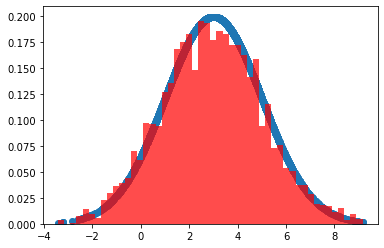

In [2]:
import random
import math
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

def norm_dist_prob(theta):
    y = norm.pdf(theta, loc=3, scale=2)
    return y

T = 5000
pi = [0 for i in range(T)]
sigma = 1
t = 0
while t < T-1:
    t = t + 1
    pi_star = norm.rvs(loc=pi[t - 1], scale=sigma, size=1, random_state=None)
    alpha = min(1, (norm_dist_prob(pi_star[0]) / norm_dist_prob(pi[t - 1])))

    u = random.uniform(0, 1)
    if u < alpha:
        pi[t] = pi_star[0]
    else:
        pi[t] = pi[t - 1]


plt.scatter(pi, norm.pdf(pi, loc=3, scale=2))
num_bins = 50
plt.hist(pi, num_bins, density=True, facecolor='red', alpha=0.7)
plt.show()